## OVERVIEW

Dimensionality reduction simply refers to the process of reducing the number of attributes in a dataset while keeping as much of the variation in the original dataset as possible

There are mainly two types of dimensionality reduction methods. Both methods reduce the number of dimensions but in different ways. It is very important to distinguish between those two types of methods. One type of method only keeps the most important features in the dataset and removes the redundant features. There is no transformation applied to the set of features. Backward elimination, Forward selection and Random forests are examples of this method. The other method finds a combination of new features. An appropriate transformation is applied to the set of features. The new set of features contains different values instead of the original values.

### Since this project requires the original data and column names has to be remain same, we will use

* High Corelation or Multi colinearity 
* Variance Inflation factor
* Backward elimination
* Forward selection
* Feature selection using tree based techniques



## Importing the libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Ultrasound_1.csv")

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,NaN,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,NaN,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,NaN,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,2855.80,2637.35,2183.4333,1582.5646,1.3666,100.0,99.0267,0.1240,1.4912,-0.0004,...,69.4220,0.5011,0.0122,0.0032,2.4250,0.0218,0.0152,0.0050,69.4220,-1
1573,2940.22,2417.85,2246.4899,1006.9548,1.0997,100.0,103.3222,0.1184,1.5218,-0.0283,...,59.2072,0.4984,0.0137,0.0042,2.7521,0.0180,0.0106,0.0030,59.2072,-1
1574,2971.99,2522.62,2239.3000,1192.7495,1.2499,100.0,100.1189,0.1187,1.5824,-0.0006,...,15.2909,0.4955,0.0094,0.0031,1.8952,0.0278,0.0042,0.0016,15.2909,1
1575,2948.53,2459.87,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,1.5877,-0.0108,...,NaN,0.5003,0.0234,0.0053,4.6768,0.0278,0.0042,0.0016,15.2909,-1


In [4]:
df.shape

(1577, 577)

In [5]:

pd.set_option("display.max_columns",1000)
pd.set_option("display.width",1000)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,NaN,NaN,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,NaN,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,NaN,NaN,NaN,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,NaN,NaN,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,NaN,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,0.0,1.4215,0.0009,0.0184,0.0200,0.01

## Let's explore our dataset

In [7]:
df.isna().sum().sum()

42093

In [8]:
df = df.replace(np.nan,0)

In [9]:
df.isna().sum().sum()

0

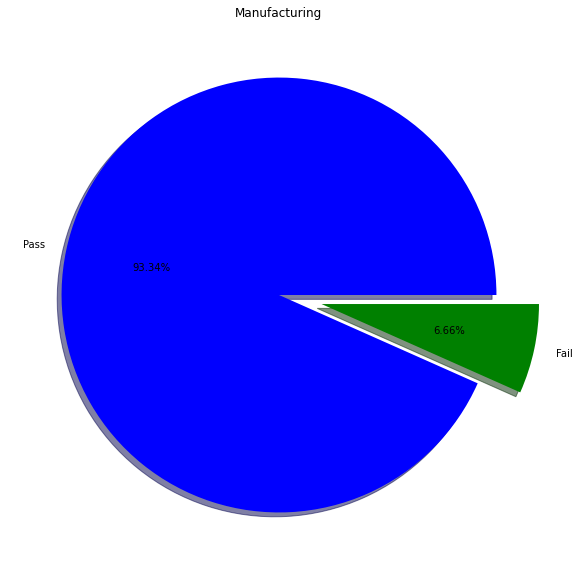

In [10]:
labels=["Pass","Fail"]
size=df["Pass/Fail"].value_counts()
colors=["blue","green"]
explode=[0,0.2]

plt.style.use("seaborn-deep")
plt.figure(figsize=(10,10))
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct="%.2f%%",shadow=True)
plt.title("Manufacturing")
plt.show()



* Our dataset is imbalanced , need to be balanced

## Using Multi colinearity concept

In [11]:
df_corr = df.copy()

<AxesSubplot:>

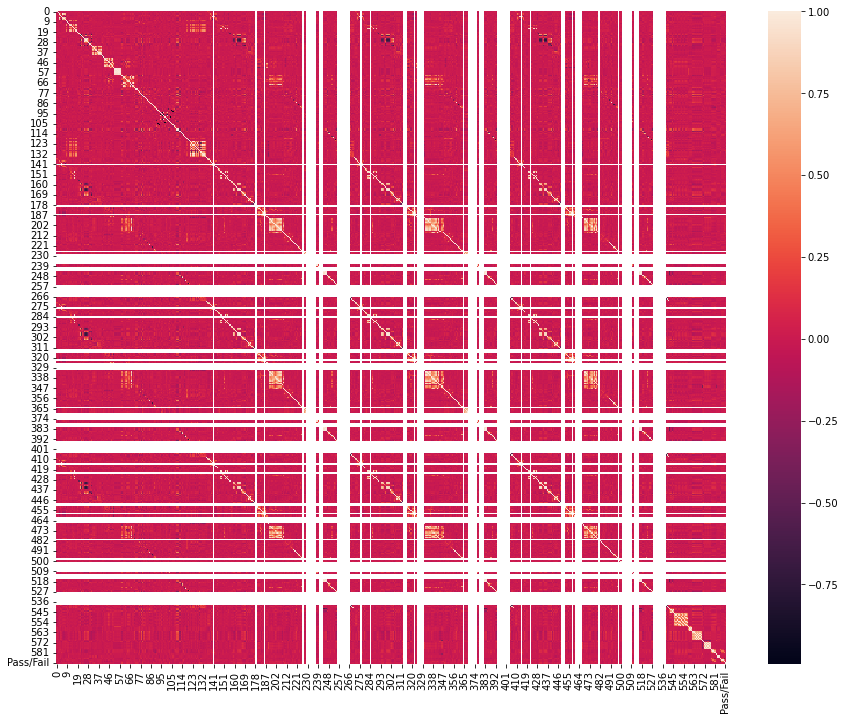

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(df_corr.corr())

* Basically in this method we are removing those features that are highly co related

In [13]:
corr_matrix = df_corr.corr()

In [14]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
upper

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,NaN,-0.051731,0.009742,0.005773,-0.001583,0.011104,0.008468,0.011955,-0.056840,0.012133,-0.017591,-0.002184,0.001246,-0.042683,0.007928,-0.002633,0.002357,0.008941,0.012924,-0.004946,-0.014800,0.019205,-0.006614,-0.016659,0.012698,0.017099,0.013448,0.055876,0.006871,-0.007209,0.004475,0.001386,-0.008008,0.004331,0.006125,-0.002699,-0.004291,-0.012262,0.002410,0.031904,0.016981,-0.014059,-0.026355,0.010844,0.023776,-0.000329,-0.040269,-0.015077,-0.009387,-0.030766,0.004603,0.005845,-0.013203,-0.003142,-0.003117,-0.008898,-0.079654,-0.013656,-0.004795,0.004141,-0.019296,0.011312,0.001412,-0.007186,-0.006595,-0.004122,-0.007787,0.013704,0.008840,0.009031,0.037457,0.019917,0.003905,0.030712,-0.070895,0.023521,0.053514,0.028016,0.005198,-0.007808,-0.001605,-0.001391,0.030751,-0.017955,-0.007265,0.003471,-0.007505,-0.021662,0.030375,-0.015613,0.000204,0.018904,-0.031432,-0.028352,0.024497,-0.022538,0.011438,-0.060543,0.028058,0.021414,-0.031808,0.008590,-0.038086,0.053424,0.054094,0.053284,-0.078640,-0.035798,0.001833,0.012597,0.062784,0.004702,-0.025102,-0.014430,0.024195,0.006334,-0.023016,0.005470,0.005472,0.018009,-0.042246,-0.025380,-0.019168,-0.052478,0.012475,0.005899,-0.002090,0.001545,0.004485,-0.022475,0.190199,0.087538,-0.003419,0.015487,-0.001784,NaN,0.000723,-0.020041,0.015308,0.028316,0.001757,-0.004623,0.006660,-0.000966,0.001208,0.002791,-0.012089,0.015784,-0.002656,0.014133,-0.023915,-0.079873,-0.013862,0.009760,0.024977,0.006287,0.001675,-0.002826,-0.007612,0.036627,0.022175,0.028284,0.021039,-0.027062,0.014663,0.005390,0.006308,0.005358,-0.003361,0.024674,-0.039653,NaN,NaN,0.036007,-0.003772,0.030710,0.028028,0.008371,0.011538,NaN,0.012059,-0.067276,0.014658,-0.005324,0.006458,0.000032,0.001260,0.004334,0.003904,-0.002440,-0.001692,-0.008053,-0

<AxesSubplot:>

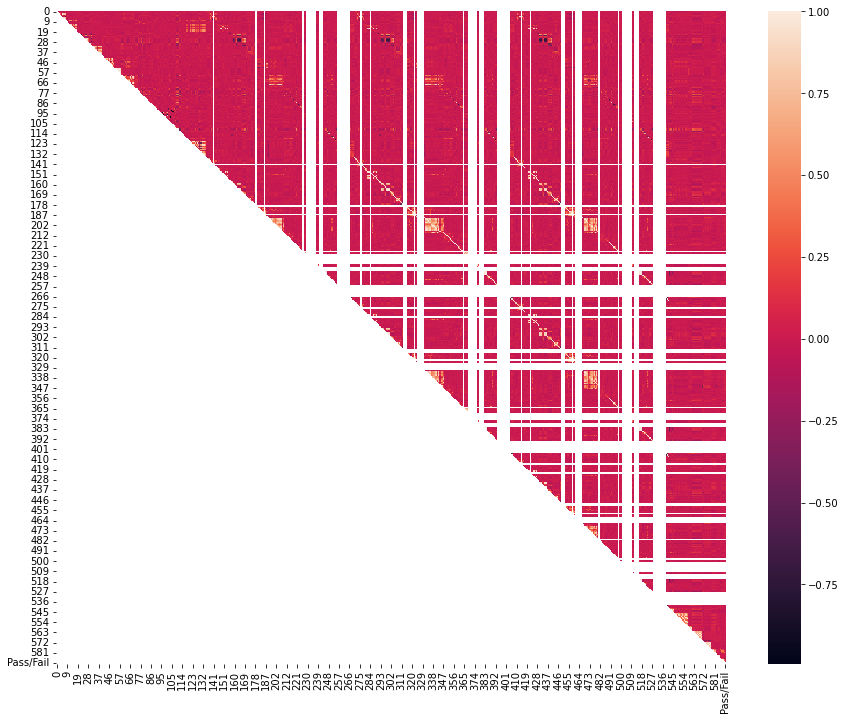

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(upper)

In [16]:
neg_coreleted=[column for column in upper.columns if any(upper[column]<-0.9)]
pos_coreleted=[column for column in upper.columns if any(upper[column]>0.9)]

In [17]:
print(neg_coreleted)
print("*****************")
print(pos_coreleted)

['96', '104', '105', '106']
*****************
['5', '18', '27', '38', '39', '50', '54', '55', '56', '57', '58', '66', '70', '73', '101', '110', '111', '123', '124', '127', '131', '133', '140', '148', '152', '154', '164', '165', '174', '199', '204', '207', '220', '245', '246', '249', '252', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '365', '366', '376', '377', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '4

In [18]:
total_corelated=neg_coreleted+pos_coreleted

In [19]:
df_corr=df_corr.drop(total_corelated,axis=1)

In [20]:
df_corr.shape

(1577, 351)

## Using Variance Inflation Factor

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [21]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
df_vif = df_corr.copy()

In [23]:
X= df_vif.drop("Pass/Fail",axis=1)
y = df_vif["Pass/Fail"]

In [24]:
Features = pd.DataFrame(X)


In [25]:
Features.head(2)

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,51,53,59,60,61,62,63,64,65,67,68,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,98,99,100,102,103,107,108,109,112,113,114,115,116,117,118,119,120,121,122,125,126,128,129,130,132,134,135,136,137,138,139,141,142,143,144,145,146,147,150,151,153,155,156,157,158,159,160,161,162,163,166,167,168,169,170,171,172,173,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,200,201,202,203,205,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,247,248,250,251,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,276,284,313,314,315,316,322,325,326,327,328,329,330,345,364,367,368,369,370,371,372,373,374,375,378,379,380,381,394,395,396,397,398,399,400,401,402,403,404,412,414,418,419,422,423,430,431,432,433,438,439,449,450,451,458,460,461,462,463,464,465,466,468,472,473,474,476,480,481,482,483,484,485,486,487,488,489,496,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,521,528,529,530,531,532,533,534,535,536,537,538,542,543,544,546,547,549,550,551,555,558,559,560,562,564,565,570,571,572,573,578,579,581,582,583,586,587,589
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.972,12.4690,1.3993,-6362.50,3051.25,-3718.5,1500.25,0.9955,1.9012,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,214.7661,4.544,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,1.0994,152.2500,72.1031,0.0000,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,0.0,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,0.0233,-0.0223,0.0,0.0010,-0.0060,-0.1042,-0.0873,0.0,0.455,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,0.9176,2.761,3.565,0.6623,0.6956,2.3403,36.5767,136.0,123.9,151.3,64.0999,480.957,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,12.328,6.774,0.0123,0.45,0.0359,0.0,0.0,145.0,562.0,788.0,157.0,0.124,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,13.62,9.01,12.878,24.0891,8.78,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,0.0,0.1085,0.0203,147.5352,0.0012,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.14,2.3331,0.0,0.0,0.0,0.0,0.0,4.4220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0036,0.0072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.1098,0.0,0.0,0.0000,0.0,129.4674,2.2790,18.4187,21.1913,10.4649,19.0813,25.1246,0.0,0.0,0.0,0.0,19.0156,0.0,0.0,0.0,0.0,0.0,0.0,33.6514,128.9886,68.1262,64.0186,40.9515,144.5999,0.0,230.2835,194.4346,0.0000,292.4117,183.7686,125.7636,128.3202,559.7668,32.8879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.7631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1096,0.0078,0.0026,0.6110,401.080,0.2955,21.84,1.53,48.3734,1.0068,0.3311,0.0895,265.296,5.22,0.0543,535.0655,2.2935,8.10,0.1188,0.0000,0.0000,0.0000,0.5025,0.0128,0.0199,0.0117,58.5665
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,103.5633,0.1216,1.4891,-0.0007,-0.0088,0.9600,202.7228,2.4472,412.4277,10.7668,0.974,12.5098,1.3811,-6290.25,3032.75,-3972.0,1497.50,0.9865,1.8942,70.2444,2.6333,0.1947,4.6613,84.8180,8.6309,50.2512,64.2144,49.7488,65.9697,78.31,2.408,70.0,360.5227,9.7645,148.9018,755.7826,1.0834,134.4973,210.7175,4.589,-3.2509,361.4355,9.9095,125.6509,11.1138,23.2509,32.6343,1.2059,147.0755,69.7495,169.2684,-0.0299,-0.0192,0.0096,-0.0322,0.0025,0.0320,-0.0335,0.0292,7.2000,0.1380,0.0

In [26]:
variable = Features.columns

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_feature=scaler.fit_transform(Features)
scaled_feature=pd.DataFrame(scaled_feature,columns=variable)

In [28]:
scaled_feature.sample(2)

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,51,53,59,60,61,62,63,64,65,67,68,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,98,99,100,102,103,107,108,109,112,113,114,115,116,117,118,119,120,121,122,125,126,128,129,130,132,134,135,136,137,138,139,141,142,143,144,145,146,147,150,151,153,155,156,157,158,159,160,161,162,163,166,167,168,169,170,171,172,173,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,200,201,202,203,205,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,247,248,250,251,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,276,284,313,314,315,316,322,325,326,327,328,329,330,345,364,367,368,369,370,371,372,373,374,375,378,379,380,381,394,395,396,397,398,399,400,401,402,403,404,412,414,418,419,422,423,430,431,432,433,438,439,449,450,451,458,460,461,462,463,464,465,466,468,472,473,474,476,480,481,482,483,484,485,486,487,488,489,496,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,521,528,529,530,531,532,533,534,535,536,537,538,542,543,544,546,547,549,550,551,555,558,559,560,562,564,565,570,571,572,573,578,579,581,582,583,586,587,589
390,-0.082597,-0.275076,-0.004047,-0.767060,-0.060554,0.395939,0.115432,1.387015,0.593856,-2.342828,0.327471,0.281732,-0.362674,0.158035,-0.138328,0.079518,0.045521,0.426927,-1.954940,1.181023,0.547308,0.598339,-1.214320,-0.184999,-0.019612,0.821093,-0.003590,1.846387,0.107255,-0.316868,-0.052916,-0.149802,0.090573,0.026773,0.478217,-0.293706,0.02519,-0.346184,-0.868665,0.640054,-0.022547,-0.860439,-1.531353,-1.564789,0.070434,-0.301025,-0.164867,-0.156388,0.562105,-0.512808,-0.123585,-0.381455,-0.050437,-0.217943,-0.346415,-0.984994,-0.171016,-0.997285,0.314439,0.271939,0.088951,-1.935812,0.179651,0.484376,-1.905794,0.215314,-0.408843,-0.735992,-0.903269,0.801868,-0.439094,-0.062602,0.729413,-1.349764,-0.220570,-1.561109,0.376062,-2.069770,0.826678,0.633157,-1.068436,1.120111,1.667483,-1.052977,-0.730741,0.900691,-0.175980,-0.073242,-0.835954,0.451929,0.089872,0.100719,0.967198,-1.887721,0.020022,0.563645,0.579428,-0.780758,-0.431895,0.213829,-0.577645,0.060055,-0.311790,-0.650725,0.840044,1.205360,-0.117868,-0.803622,0.0,0.011856,0.034200,-0.029647,1.966573,-0.319507,-0.331733,-0.988950,0.004765,-0.449519,-0.155067,-0.171510,-0.232998,-0.286712,1.151655,0.107641,0.445670,-0.690481,-0.031069,-0.080749,-0.368514,-1.532070,-0.967305,1.272288,-0.865897,-0.024100,-0.620990,-0.320849,-1.155949,-0.045849,0.0,0.0,1.842520,1.627953,-0.374551,0.386769,-0.683379,0.845932,0.0,0.312246,-1.438285,0.012299,0.103572,-0.365000,-0.390689,-0.438259,0.480755,0.169522,0.642011,0.046354,0.237499,-0.02519,0.232908,-0.225190,0.218934,1.555175,-0.010068,-0.152575,0.684380,0.510129,-0.051753,-0.134880,0.602677,-0.071550,1.022943,-0.490569,0.325040,0.0,0.270335,1.334385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.047046,-0.525009,0.0,0.0,0.0,0.0,-0.040105,-0.040812,0.285162,0.317412,-0.101813,0.033809,-1.155308,1.664881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.236905,-1.344423,-0.772292,0.0,0.0,0.0,0.0,0.0,2.607579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.306721,0.0,1.065531,1.073257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.601635,0.0,-1.109123,-0.264080,0.0,-0.992982,0.306176,-0.058282,0.767734,-0.823851,-0.516737,-1.114452,0.0,0.0,0.0,0.0,-0.728237,0.0,0.0,0.0,0.0,0.0,0.0,-0.965148,-0.081383,0.551057,0.581387,-0.313430,0.298633,0.0,2.092337,-0.634637,-0.994899,-0.908678,-1.039584,-0.642816,0.864876,0.606097,-0.578768,0.0,0.967823,-0.743223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.205319,0.775886,0.0,0.0,0.0,0.0,-0.112259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.303147,-0.421084,0.303618,-0.508765,0.480545,-0.270903,0.414684,-0.147764,0.367283,-0.195888,-1.060752,-0.828984,0.342911,0.660737,-0.464738,0.200813,1.152144,

In [29]:
vif = pd.DataFrame()

In [30]:
vif["Features"] = scaled_feature.columns

In [31]:
scaled_feature.values

array([[-0.16895192, -0.68229909,  0.07557917, ..., -0.12024494,
        -0.5379562 , -0.44037573],
       [ 0.25827839,  0.22087954,  0.02574619, ...,  0.11534592,
         1.52625537,  0.33546954],
       [-0.49029448,  0.04064566,  0.00341421, ...,  0.11534592,
         1.52625537,  0.33546954],
       ...,
       [-0.17906997,  0.20616324,  0.28013625, ...,  0.52153707,
        -1.38859283, -0.90228502],
       [-0.30600541, -0.13459228,  0.10462666, ...,  0.52153707,
        -1.38859283, -0.90228502],
       [-0.31747614,  0.10282336,  0.31462476, ...,  0.68401353,
        -0.20904337, -0.54347587]])

In [32]:
vif["VIF"]= [variance_inflation_factor(scaled_feature.values,i) for i in range(scaled_feature.shape[1])]

In [33]:
pd.set_option("display.max_rows",1000)

In [34]:
vif

,Features,VIF
0,0,1.273117
1,1,1.216330
2,2,12.646887
3,3,8.280885
4,4,3.945302
5,6,9.123192
6,7,6.926577
7,8,2.160755
8,9,1.402205
9,10,1.394361


In [35]:
high_vif = vif[vif["VIF"] > 15]

In [36]:
high_vif.shape

(43, 2)

###  43 values has high VIF values,that can be removed from the dataset

In [37]:
high_vif =high_vif["Features"].values

In [38]:
df_vif = df_vif.drop(high_vif,axis=1)

In [39]:
print("*"*50)
print("shape of the dataframe after removing the multi colinearity is",df_vif.shape)

**************************************************
shape of the dataframe after removing the multi colinearity is (1577, 308)


## Backward Elimination 

This method eliminates (removes) features from a dataset through a recursive feature elimination (RFE) process. The algorithm first attempts to train the model on the initial set of features in the dataset and calculates the performance of the model (usually, accuracy score for a classification model and RMSE for a regression model). Then, the algorithm drops one feature (variable) at a time, trains the model on the remaining features and calculates the performance scores. The algorithm repeats eliminating features until it detects a small (or no) change in the performance score of the model and stops there!

In [40]:
from sklearn.feature_selection import RFE

In [41]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [42]:
df_be = df_vif.copy()

In [43]:
df_be.sample(2)

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,17,19,20,21,22,23,24,28,29,30,31,32,33,35,40,41,47,53,59,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,99,100,102,103,107,108,109,112,113,114,115,116,117,118,119,120,122,125,126,128,129,130,132,134,135,136,137,138,141,142,143,144,145,146,151,153,155,156,157,158,161,162,163,166,167,168,169,170,171,172,173,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,197,198,200,205,208,210,211,212,213,214,215,216,217,218,219,221,222,223,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,247,248,250,251,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,276,284,313,314,315,316,322,325,326,327,328,329,330,345,364,367,368,369,370,371,372,373,374,375,378,379,380,381,394,395,396,397,398,399,400,401,402,403,404,414,418,419,422,423,432,433,438,439,449,450,451,458,460,461,462,463,464,465,466,468,472,476,481,482,483,484,485,486,487,488,489,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,521,528,529,530,531,532,533,534,535,536,537,538,542,543,544,546,547,550,551,555,558,559,560,562,564,565,570,571,572,573,578,579,581,582,583,586,587,589,Pass/Fail
726,2994.75,2583.36,2210.9778,1572.4698,1.0204,106.2089,0.1222,1.4476,0.0169,0.0025,0.9714,197.9483,12.6703,428.8017,0.9772,12.4859,1.4123,-6424.5,2982.0,-4602.25,1303.00,66.0889,2.8444,0.1962,4.6613,85.4449,9.2200,64.0559,79.47,2.833,1.2376,4.562,-1.4191,94.1913,0.0,0.0177,-0.0750,0.0376,-0.0223,0.0093,-0.0663,-0.0723,-0.0350,7.709,0.1313,0.0000,2.4178,0.9861,1870.0537,0.1487,8977.0199,0.0000,-0.0006,-0.0009,0.0,0.0000,0.0,0.0000,-0.0090,0.0000,0.0000,0.0000,0.4605,0.9478,0.0,772.5988,0.9906,60.1503,0.5949,0.9721,6.1783,3.790,1.0450,2.742,3.128,1.0400,0.8076,2.3985,38.2279,88.0,77.2,61.1,60.9001,0.0,5.86,0.0037,0.1039,0.0444,0.0456,13.308,0.0079,0.24,0.0670,0.0,0.0,2094.0,288.0,0.102,2.7,1.4,0.158,0.174,0.8473,0.0920,0.2920,0.6014,0.7889,0.1962,0.351,0.0,0.0,19.11,0.597,16.40,18.082,0.1010,8.64,0.0,7.08,38.630,0.100,16.09,0.235,8.91,11.28,34.906,0.0892,0.0269,0.0327,0.0716,0.1041,0.0720,0.0552,0.0766,2.3715,0.0040,0.0251,0.0014,102.5078,509.0000,0.0,0.0138,0.0103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0033,0.0048,0.0,0.0,0.0,0.0,0.0000,0.0146,0.0222,61.0144,0.0011,0.0141,0.0178,0.5707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0579,16.484,3.9450,0.0,0.0,0.0,0.0,0.0,6.6799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.1111,0.0,0.0,49.1702,45.4995,22.1028,49.2188,80.5210,0.0,0.0,0.0,0.0,16.6756,0.0,0.0,0.0,0.0,0.0,0.0,665.9193,36.1821,12.9560,0.0,503.4215,35.8667,86.9103,321.4366,0.0000,108.6792,76.3750,219.1702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.8715,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1096,0.0078,0.0026,1.27,405.48,18.62,1.04,69.6731,0.9773,0.1882,0.0419,264.272,4.98,0.0877,533.9782,2.3449,6.00,0.2947,0.0,0.0,0.0,0.5005,0.0118,0.0131,0.0112,85.1551,-1
838,3048.76,2545.68,2224.6778,1308.6479,1.3907,101.1333,0.1208,1.4563,0.0075,0.0031,0.9679,199.0494,9.8057,407.5889,0.9809,12.5120,1.3924,-5122.5,2541.5,-3889.00,6309.25,70.9889,1.9333,0.1668,3.3848,84.3610,8.8624,64.6702,81.74,2.673,1.1750,4.584,4.9118,111.3778,0.0,0.0216,-0.0643,-0.0092,0.0450,-0.0215,0.0193,-0.0156,0.0089,7.440,0.1286,0.1152,2.4604,0.9896,1893.0174,0.1893,9060.0199,0.0118,-0.0004,0.0015,0.0,-0.0028,0.0,0.0286,-0.0114,0.0416,0.0501,0.9763,0.4691,0.9593,0.0,782.5507,0.9913,57.1869,0.5995,0.9693,6.2230,3.235,0.9838,2.783,3.153,0.7096,0.8543,2.2802,37.2972,122.0,141.8,101.7,51.5000,0.0,5.65,0.0033,0.1041,0.0616,0.0442,4.916,0.0053,0.20,0.0294,0.0,0.0,1237.0,21789.0,0.107,3.0,1.1,0.118,0.292,0.6458,0.1516,0.3272,0.6310,0.8332,0.3278,0.260,0.0,0.0,14.82,0.413,4.37,26.363,0.2082,11.63,0.0,20.30,19.791,0.259,17.40,0.218,21.37,7.04,92.365,0.0542,0.0323,0.0334,0.0266,0.0515,0.0167,0.0702,0.0412,3.9360,0.0038,0.0748,0.0017,157.4490,493.0996,0.0,0.0121,0.0163,0.0,0.0,0

In [44]:
df_be.shape

(1577, 308)

In [45]:
X = df_be.drop("Pass/Fail",axis=1)
y=df_be["Pass/Fail"]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=120)

In [48]:
estimator = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=True)
selector = RFE(estimator, n_features_to_select=120, step=1)
selector.fit(X, y)
X_selected = selector.transform(X)

In [49]:
X_selected.shape

(1577, 120)

In [50]:
selector.support_


array([ True, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False, False, False,  True, False,  True, False,
        True, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [51]:
X_selected = pd.DataFrame(X_selected)

In [52]:
X_train1 = selector.transform(X_train1)

In [53]:
X_test1 = selector.transform(X_test1)

In [54]:
X_train1.shape

(1261, 120)

In [55]:
X_test1.shape

(316, 120)

## Forward Feature selection

 The algorithm attempts to train the model on a single feature in the dataset and calculates the performance of the model (usually, accuracy score for a classification model and RMSE for a regression model). Then, the algorithm adds (selects) one feature (variable) at a time, trains the model on those features and calculates the performance scores. The algorithm repeats adding features until it detects a small (or no) change in the performance score of the model and stops there!

In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [57]:
df_fs = df_vif.copy()

In [58]:
X = df_fs.drop("Pass/Fail",axis=1)
y=df_fs["Pass/Fail"]

In [59]:
selector1 = SelectKBest(mutual_info_classif,k=120)

In [60]:
selector1.fit(X,y)

SelectKBest(k=120,
            score_func=<function mutual_info_classif at 0x000002631A790B80>)

In [61]:
selector1.get_support()

array([ True, False,  True,  True, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True, False,  True, False,
        True, False,  True,  True,  True, False,  True, False,  True,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False,  True, False, False, False,  True, False,
        True,  True,

In [62]:
X_train2,X_test2,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=120)

In [63]:
X_train2.shape

(1261, 307)

In [64]:
X_train2 = selector1.transform(X_train2)

In [65]:
X_test2 = selector1.transform(X_test2)

In [66]:
X_train2.shape

(1261, 120)

In [69]:
param_dtree = [{'criterion': ['gini','entropy'], 'max_depth': range(2,10)}]

In [70]:
gsv=GridSearchCV(DecisionTreeClassifier(),param_grid=param_dtree,cv=5,scoring="roc_auc")

In [75]:
gsv.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [78]:
gsv.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [93]:
dtree = DecisionTreeClassifier(max_depth=4)

In [80]:
param_rf = [{'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 150]}]

In [82]:
modelCV = GridSearchCV(RandomForestClassifier(), param_rf, cv=5, scoring='roc_auc')

In [83]:
modelCV.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'n_estimators': [50, 100, 150]}],
             scoring='roc_auc')

In [84]:
modelCV.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=150)

In [92]:
rf = RandomForestClassifier(max_depth=15,n_estimators=150)

In [86]:
param_gb = [{'n_estimators': [100, 200, 400], 'learning_rate': [.01,.05,.1]}]

model = GradientBoostingClassifier(random_state=101)

modelgb = GridSearchCV(model, param_gb, cv=5, scoring = 'roc_auc')
 
modelgb.fit(X_train1,y_train1)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=101),
             param_grid=[{'learning_rate': [0.01, 0.05, 0.1],
                          'n_estimators': [100, 200, 400]}],
             scoring='roc_auc')

In [87]:
modelgb.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, random_state=101)

In [88]:
gb=GradientBoostingClassifier(learning_rate=0.05, random_state=101)

In [89]:
xgb= XGBClassifier()

In [91]:
ada = AdaBoostClassifier()

## MODEL BUILDING

In [104]:
def final_model(model,X_train,y_train,X_test,y_test):
    evolve=model.fit(X_train,y_train)
    y_pred = evolve.predict(X_test)
    print("The accuracy score of the {} is {}".format(model,accuracy_score(y_pred,y_test)))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    auc =roc_auc_score(y_test, evolve.predict_proba(X_test)[:,1])
    print("The auc score is",auc)
    
    

## Buiding The model with the features that are selected after backward elimination

The accuracy score of the AdaBoostClassifier() is 0.9082278481012658
The auc score is 0.661670871049117


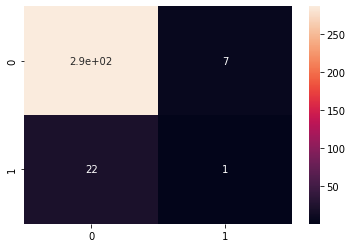

In [105]:
final_model(ada,X_train1,y_train1,X_test1,y_test1)

The accuracy score of the DecisionTreeClassifier(max_depth=4) is 0.9050632911392406
The auc score is 0.5888113963496068


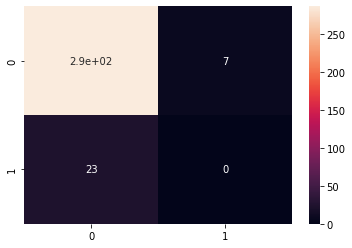

In [106]:
final_model(dtree,X_train1,y_train1,X_test1,y_test1)

The accuracy score of the GradientBoostingClassifier(learning_rate=0.05, random_state=101) is 0.9272151898734177
The auc score is 0.6335509719542959


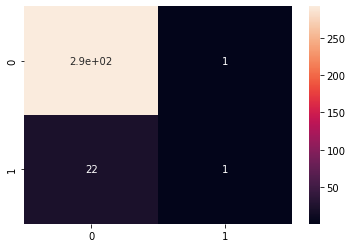

In [107]:
final_model(gb,X_train1,y_train1,X_test1,y_test1)

The accuracy score of the RandomForestClassifier(max_depth=15, n_estimators=150) is 0.9272151898734177
The auc score is 0.7121234604540733


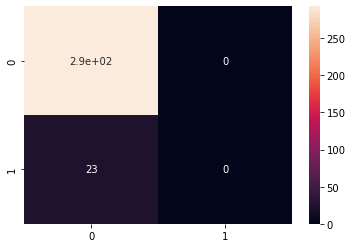

In [108]:
final_model(rf,X_train1,y_train1,X_test1,y_test1)

## Building the model with the features that are selected after forward selection 

The accuracy score of the AdaBoostClassifier() is 0.9018987341772152
The auc score is 0.5481525448879656


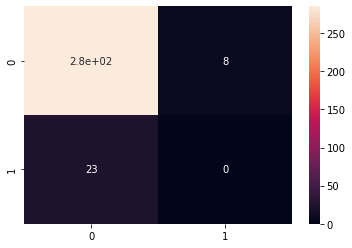

In [111]:
final_model(ada,X_train2,y_train,X_test2,y_test)

The accuracy score of the DecisionTreeClassifier(max_depth=4) is 0.9018987341772152
The auc score is 0.5860661819261018


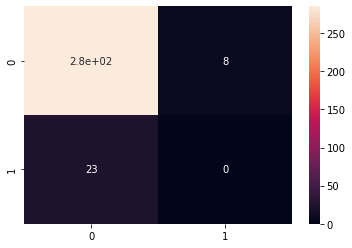

In [112]:
final_model(dtree,X_train2,y_train,X_test2,y_test)

The accuracy score of the GradientBoostingClassifier(learning_rate=0.05, random_state=101) is 0.9240506329113924
The auc score is 0.6499480635109067


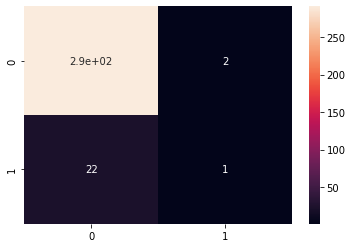

In [113]:
final_model(gb,X_train2,y_train,X_test2,y_test)

The accuracy score of the RandomForestClassifier(max_depth=15, n_estimators=150) is 0.9272151898734177
The auc score is 0.7284463570262649


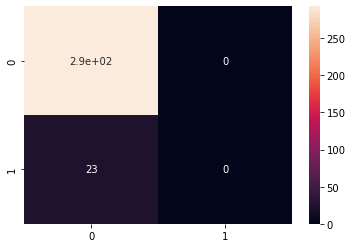

In [114]:
final_model(rf,X_train2,y_train,X_test2,y_test)

## Balancing the Dataset using SMOTE

In [115]:
from imblearn.over_sampling import SMOTE
osmote=SMOTE()
Xs_train,ys_train=osmote.fit_resample(X_train1,y_train1)

The accuracy score of the AdaBoostClassifier() is 0.8386075949367089
The auc score is 0.5813918979077015


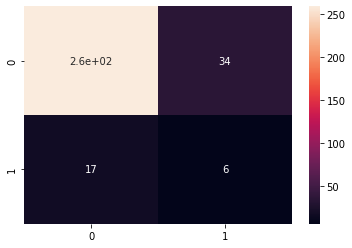

In [117]:
final_model(ada,Xs_train,ys_train,X_test1,y_test1)

The accuracy score of the DecisionTreeClassifier(max_depth=4) is 0.7816455696202531
The auc score is 0.5270811693129545


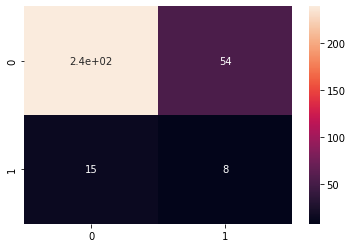

In [118]:
final_model(dtree,Xs_train,ys_train,X_test1,y_test1)

The accuracy score of the GradientBoostingClassifier(learning_rate=0.05, random_state=101) is 0.8829113924050633
The auc score is 0.661670871049117


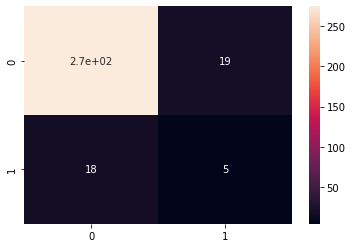

In [119]:
final_model(gb,Xs_train,ys_train,X_test1,y_test1)

The accuracy score of the RandomForestClassifier(max_depth=15, n_estimators=150) is 0.9272151898734177
The auc score is 0.6959489538507196


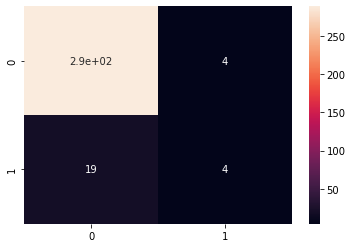

In [121]:
final_model(rf,Xs_train,ys_train,X_test1,y_test1)

## Conclusion

* After performing multi colinearity we reduced 225 features
* After VIF we reduced 43 features 
* Finally we reduced them to 120 features by using forward and backward elimination
* Since the FP and FN are really high it was identify thta the model is tend to overfit on the pass values so balancing done by using SMOTE method
* After trained with multiple models finally the RandomForest model is giving 93% accuracy and 70 of auc value